In [2]:
from scipy.io.wavfile import read

In [37]:
from scipy import fft

In [55]:
from scipy.signal import welch

In [5]:
import IPython

In [6]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [11]:
# Define the time interval (seconds)
time_interval = 10
t = np.linspace(0, time_interval, int(time_interval * fs))

In [30]:
fs, square = read('../resources/square.wav')
_, l_sweep = read('../resources/linear_sweep.wav')
_, e_sweep = read('../resources/exponential_sweep.wav')
_, white_noise = read('../resources/white_noise.wav')

48000


In [153]:
# Plot the power spectrum of the signal
def plot_spectrogram(signal, title):
    plt.figure(figsize=(20, 8))
    f, R_xx = welch(signal,fs, nperseg=4096,scaling='spectrum')
    plt.semilogy(f, R_xx)
    plt.xlabel('$f$ [hz]', fontsize=18)
    plt.ylabel('$R_{xx}$', fontsize=18)
    plt.title(title)
    plt.grid()
    plt.show()

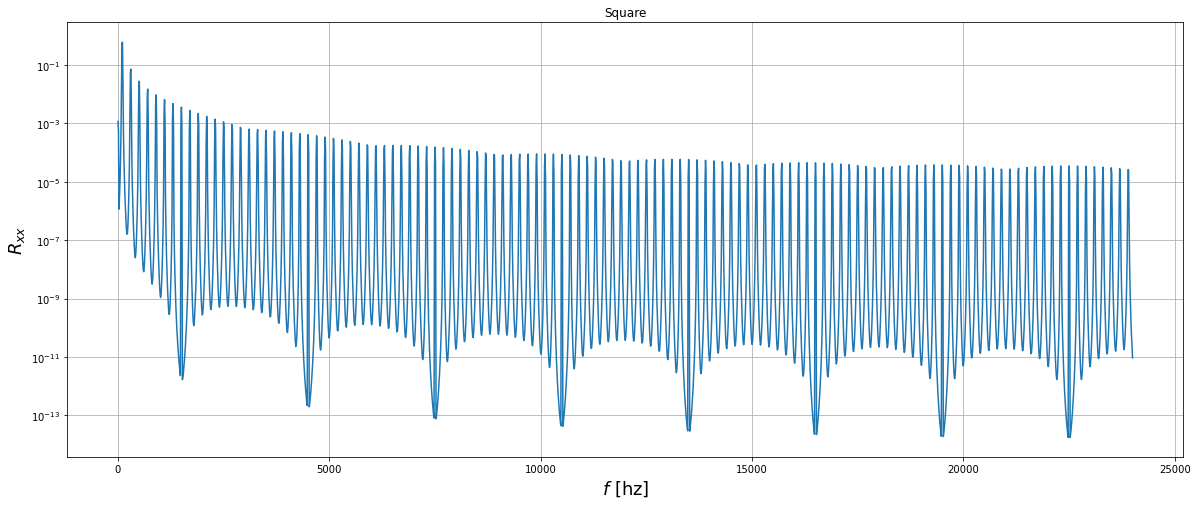

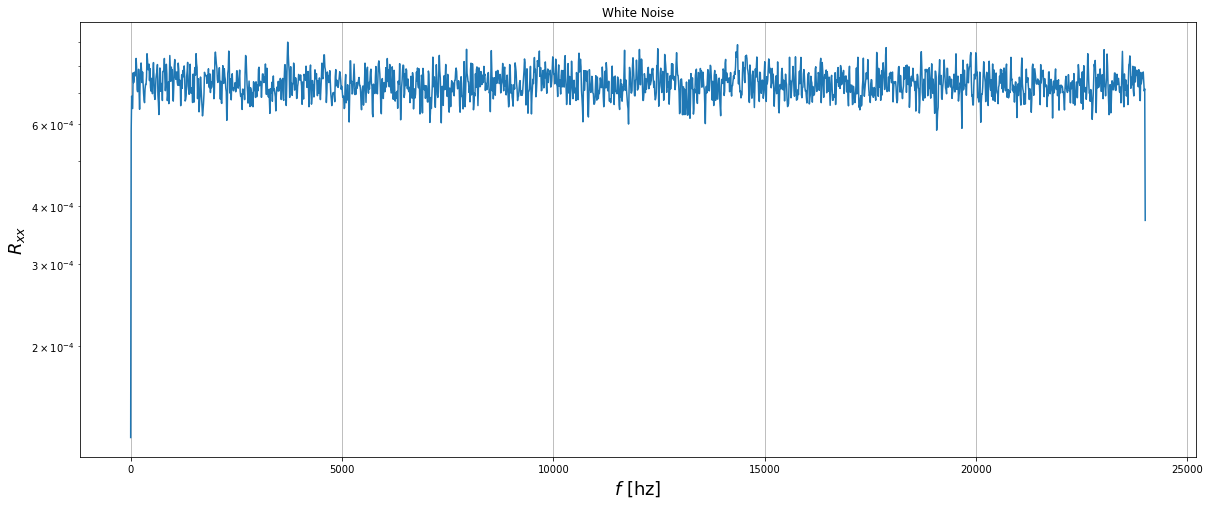

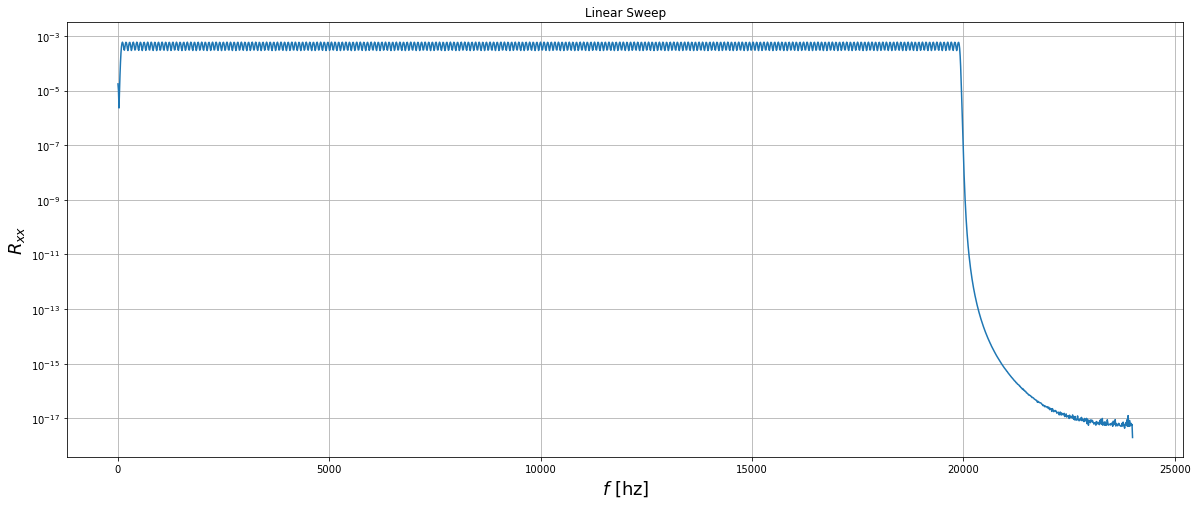

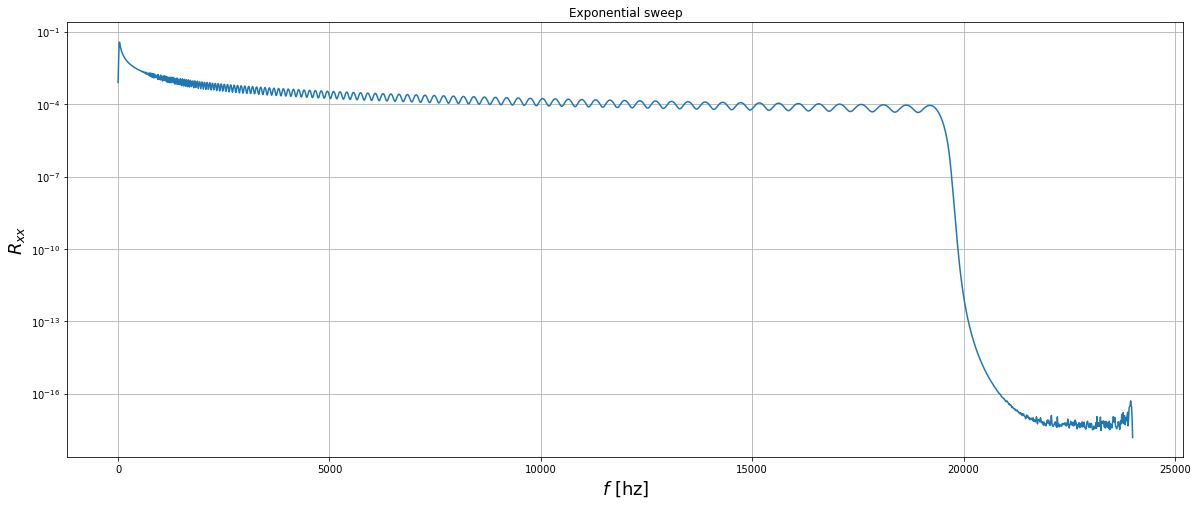

In [154]:
plot_spectrogram(square, 'Square')
plot_spectrogram(white_noise, 'White Noise')
plot_spectrogram(l_sweep, 'Linear Sweep')
plot_spectrogram(e_sweep, 'Exponential sweep')

# Análisis
Como fue mencionado previamente, la señal que posea un mayor contenido espectral será la que más información proveerá para estimar la respuesta al impulso de la habitación ya que de esta forma se sabrá como responde la habitación ante estas frecuencias. Únicamente viendo los periodogramas, se podría decir entonces que, el barrido lineal de frecuencias será la mejor por su tener una amplitud constante para todas las frecuencias entre 20Hz y 20kHz.